In [1]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
from sklearn.cluster import KMeans

In [2]:
face = misc.face()
face[0:1]

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]]], dtype=uint8)

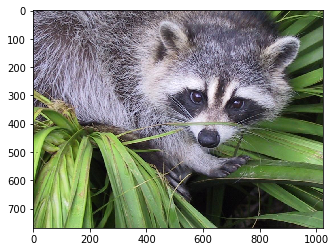

In [4]:
import matplotlib.pyplot as plt
plt.imshow(face)
plt.show()

In [5]:
face.shape

(768, 1024, 3)

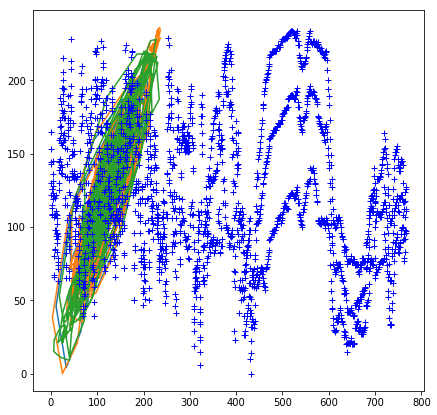

In [6]:
fig = plt.figure(figsize=(7,7))
plt.plot(face[:,0],face[:,1], face[:,2], 'b+')

In [7]:
fcgrey = np.mean(face, -1)

In [8]:
fcgrey.shape

(768, 1024)

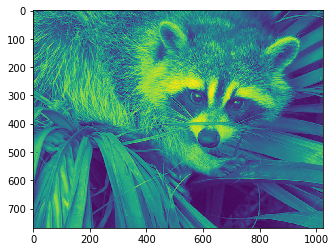

In [9]:
import matplotlib.pyplot as plt
plt.imshow(fcgrey)
plt.show()

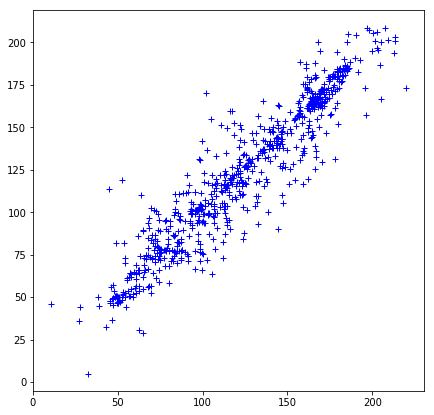

In [10]:
fig = plt.figure(figsize=(7,7))
plt.plot(fcgrey[:,0],fcgrey[:,1],'b+')

In [11]:
def ClustnCompressImage(clustsize):
    km = KMeans(n_clusters = clustsize,n_init=10, max_iter=200)
    km.fit(fcgrey)
    cls = np.asarray(km.cluster_centers_,dtype=np.uint8)
    labels = np.asarray(km.labels_, dtype=np.uint8)
    print("Cluster shape is {},\nlabels shape is {},\nInteria is {},\ntotal clusters are {}"\
          .format(cls.shape, labels.shape, km.inertia_, clustsize))
    
    fc_compressed = np.zeros((fcgrey.shape[0], fcgrey.shape[1]), dtype=np.float)
    for i in range(fcgrey.shape[0]):
        for j in range(fcgrey.shape[1]):
            fc_compressed[i,j] = cls[labels[i],j]
            
    plt.imshow(fc_compressed)
    plt.show()

Cluster shape is (5, 1024),
labels shape is (768,),
Interia is 1074953548.046851,
total clusters are 5


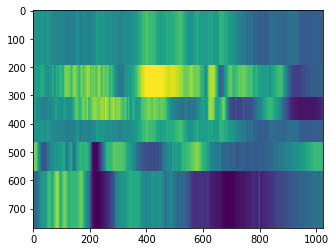

In [12]:
ClustnCompressImage(5)

Cluster shape is (100, 1024),
labels shape is (768,),
Interia is 221953796.02484944,
total clusters are 100


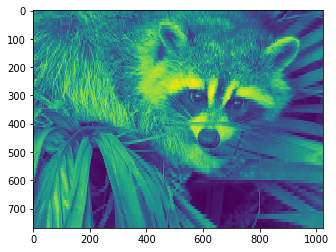

In [13]:
ClustnCompressImage(100)

<span style="color:black; font-size:1.1em;">**So we have changed the coloured racoon image into grey scale image by converting 3D image into 2D.**</span>

<span style="color:black; font-size:1.1em;">**We successfully applied the Kmeans and compressed the image into 5 clusters. The image is hardly visible in this case.**</span>

<span style="color:black; font-size:1.1em;">**With the increase in cluster size the inertia has reduced and clarity of the image has increased drastically.**</span>